In [1]:
# cargar librerías a usar
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
# Paso 1 - Carga del Conjunto de Datos

df = pd.read_csv("driver_standings.csv")

In [ ]:
# Paso 2 - Visualización de una Muestra
df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [ ]:
# Paso 3 - Normalización de los Datos: No se requiere normalizar sin embargo lo hago
columnas_a_normalizar = ['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'wins']
datos_a_normalizar = df[columnas_a_normalizar]
df.head()
datos_a_normalizar.head()

,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0
2,3,18,3,6.0,3,0
3,4,18,4,5.0,4,0
4,5,18,5,4.0,5,0


In [ ]:
# 4 Construir el modelo de clasificación
import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
X = datos_a_normalizar
y = df['raceId']
# dividir los datos en conjuntos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 11562 (45.16 KB)
Trainable params: 11562 (45.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 4 Entrenar el modelo
# escalar las caracteristicas usando StandarScaler para asegurar la misma escala en todas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# se crea una instancia de MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=100, random_state=42, verbose=True)

# entrenar el modelo
mlp_clf.fit(X_train_scaled, y_train)

# predecir las etiquetas para el conjunto de prueba
y_pred = mlp_clf.predict(X_test_scaled)

# calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Ajustar los valores de la columna 'position' para que estén en el rango [0, 9]
df['position'] = df['position'].apply(lambda x: min(max(0, x - 1), 9))
history = model.fit(datos_a_normalizar, df['position'], epochs=10)

# df['position'] = df['position'].apply(lambda x: min(max(0, x - 1), 9))
# history = model.fit(datos_a_normalizar, df['position'], epochs=10)

Iteration 1, loss = 1.25433707
Iteration 2, loss = 0.75762540
Iteration 3, loss = 0.66770975
Iteration 4, loss = 0.62560256
Iteration 5, loss = 0.59749024
Iteration 6, loss = 0.57428352
Iteration 7, loss = 0.55342326
Iteration 8, loss = 0.53453247
Iteration 9, loss = 0.51617097
Iteration 10, loss = 0.49862729
Iteration 11, loss = 0.48275138
Iteration 12, loss = 0.46708432
Iteration 13, loss = 0.45194323
Iteration 14, loss = 0.43764743
Iteration 15, loss = 0.42386236
Iteration 16, loss = 0.41068738
Iteration 17, loss = 0.39765072
Iteration 18, loss = 0.38557381
Iteration 19, loss = 0.37329790
Iteration 20, loss = 0.36213718
Iteration 21, loss = 0.35188918
Iteration 22, loss = 0.34156727
Iteration 23, loss = 0.33197617
Iteration 24, loss = 0.32211366
Iteration 25, loss = 0.31321870
Iteration 26, loss = 0.30404634
Iteration 27, loss = 0.29538452
Iteration 28, loss = 0.28708996
Iteration 29, loss = 0.27921634
Iteration 30, loss = 0.27137040
Iteration 31, loss = 0.26378683
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1081/1081 [==============================] - 4s 3ms/step - loss: 56.0652 - accuracy: 0.5787
Epoch 2/10
1081/1081 [==============================] - 3s 3ms/step - loss: 3.6029 - accuracy: 0.6491
Epoch 3/10
1081/1081 [==============================] - 2s 2ms/step - loss: 1.3393 - accuracy: 0.7133
Epoch 4/10
1081/1081 [==============================] - 2s 2ms/step - loss: 1.4232 - accuracy: 0.7083
Epoch 5/10
1081/1081 [==============================] - 2s 2ms/step - loss: 1.1947 - accuracy: 0.7119
Epoch 6/10
1081/1081 [==============================] - 6s 6ms/step - loss: 1.5462 - accuracy: 0.7082
Epoch 7/10
1081/1081 [==============================] - 6s 5ms/step - loss: 1.1897 - accuracy: 0.7117
Epoch 8/10
1081/1081 [==============================] - 4s 3ms/step - loss: 1.1911 - accuracy: 0.7121
Epoch 9/10
1081/1081 [==============================] - 2s 2ms/step - loss: 1.1873 - accuracy: 0.7120
Epoch 10/10
1081/1081 [==============================] - 4s 3ms/step - loss: 1.1868 - accura

<Axes: >

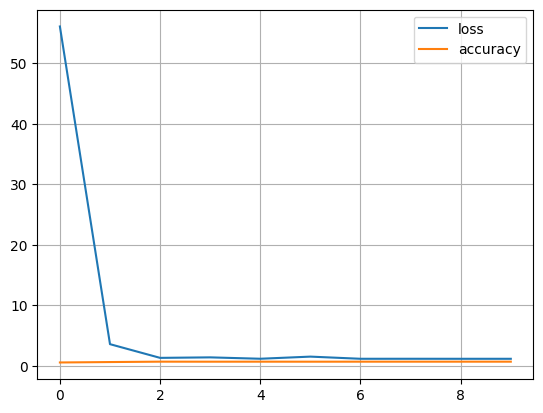

In [ ]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(datos_a_normalizar, df['position'])
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
#

1081/1081 [==============================] - 2s 2ms/step - loss: 1.2271 - accuracy: 0.7136
loss: 1.2270910739898682
accuracy: 0.7136287093162537
